In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

from matplotlib import pyplot as plt 
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler, MinMaxScaler

In [2]:
# import ddata
df_train = pd.read_csv("E:/ML/AISS/patient_stay_2_1310/train_data.csv")
df_test = pd.read_csv("E:/ML/AISS/patient_stay_2_1310/test_data.csv")
#df.isnull().sum()
#print(df_train.head())

In [3]:
label_encoder = preprocessing.LabelEncoder()
#df_train['Stay']= label_encoder.fit_transform(df_train['Stay']) 

In [4]:
stay_train = df_train.Stay

In [5]:
X = df_train.drop("Stay", axis=1)
y = df_test
data = pd.concat([X,y])

In [6]:
#print(data.dtypes)
print(data.shape)

(455495, 17)


In [7]:
data.head(3)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0


In [8]:
# rename columns
original_col = data.columns
new_col = ['case_id','Hospital_code','Hospital_type_code','City_Code_Hospital','Hospital_region_code','Available_Extra_Rooms_in_Hospital','Department','Ward_Type','Ward_Facility_Code','Bed_Grade','patientid','City_Code_Patient','Type_of_Admission','Severity_of_Illness','Visitors_with_Patient','Age','Admission_Deposit']                                                                                                               
data =data.rename(columns=dict(zip(original_col, 
new_col)))
#data.head()
print(data.shape)
#print(data.head())

(455495, 17)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455495 entries, 0 to 137056
Data columns (total 17 columns):
case_id                              455495 non-null int64
Hospital_code                        455495 non-null int64
Hospital_type_code                   455495 non-null object
City_Code_Hospital                   455495 non-null int64
Hospital_region_code                 455495 non-null object
Available_Extra_Rooms_in_Hospital    455495 non-null int64
Department                           455495 non-null object
Ward_Type                            455495 non-null object
Ward_Facility_Code                   455495 non-null object
Bed_Grade                            455347 non-null float64
patientid                            455495 non-null int64
City_Code_Patient                    448806 non-null float64
Type_of_Admission                    455495 non-null object
Severity_of_Illness                  455495 non-null object
Visitors_with_Patient                455495 non-null

In [10]:
# check missing values
data.isnull().sum()
#df.Hospital_code.count()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available_Extra_Rooms_in_Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed_Grade                             148
patientid                               0
City_Code_Patient                    6689
Type_of_Admission                       0
Severity_of_Illness                     0
Visitors_with_Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

In [11]:
mode_bed_grade = data.Bed_Grade.mode()
data.Bed_Grade = data.Bed_Grade.fillna(2.0)
print(data.Bed_Grade.mode())

0    2.0
dtype: float64


In [12]:
print(data.City_Code_Patient.mode())
data.City_Code_Patient = data.City_Code_Patient.fillna(8.0)

0    8.0
dtype: float64


In [13]:
#df.info()
data.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available_Extra_Rooms_in_Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed_Grade                            0
patientid                            0
City_Code_Patient                    0
Type_of_Admission                    0
Severity_of_Illness                  0
Visitors_with_Patient                0
Age                                  0
Admission_Deposit                    0
dtype: int64

Missing values replaced by mode values in 

        Bed_Grade 
        City_Code_Patient 

In [14]:
data.shape

(455495, 17)

c:\users\sheetal\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


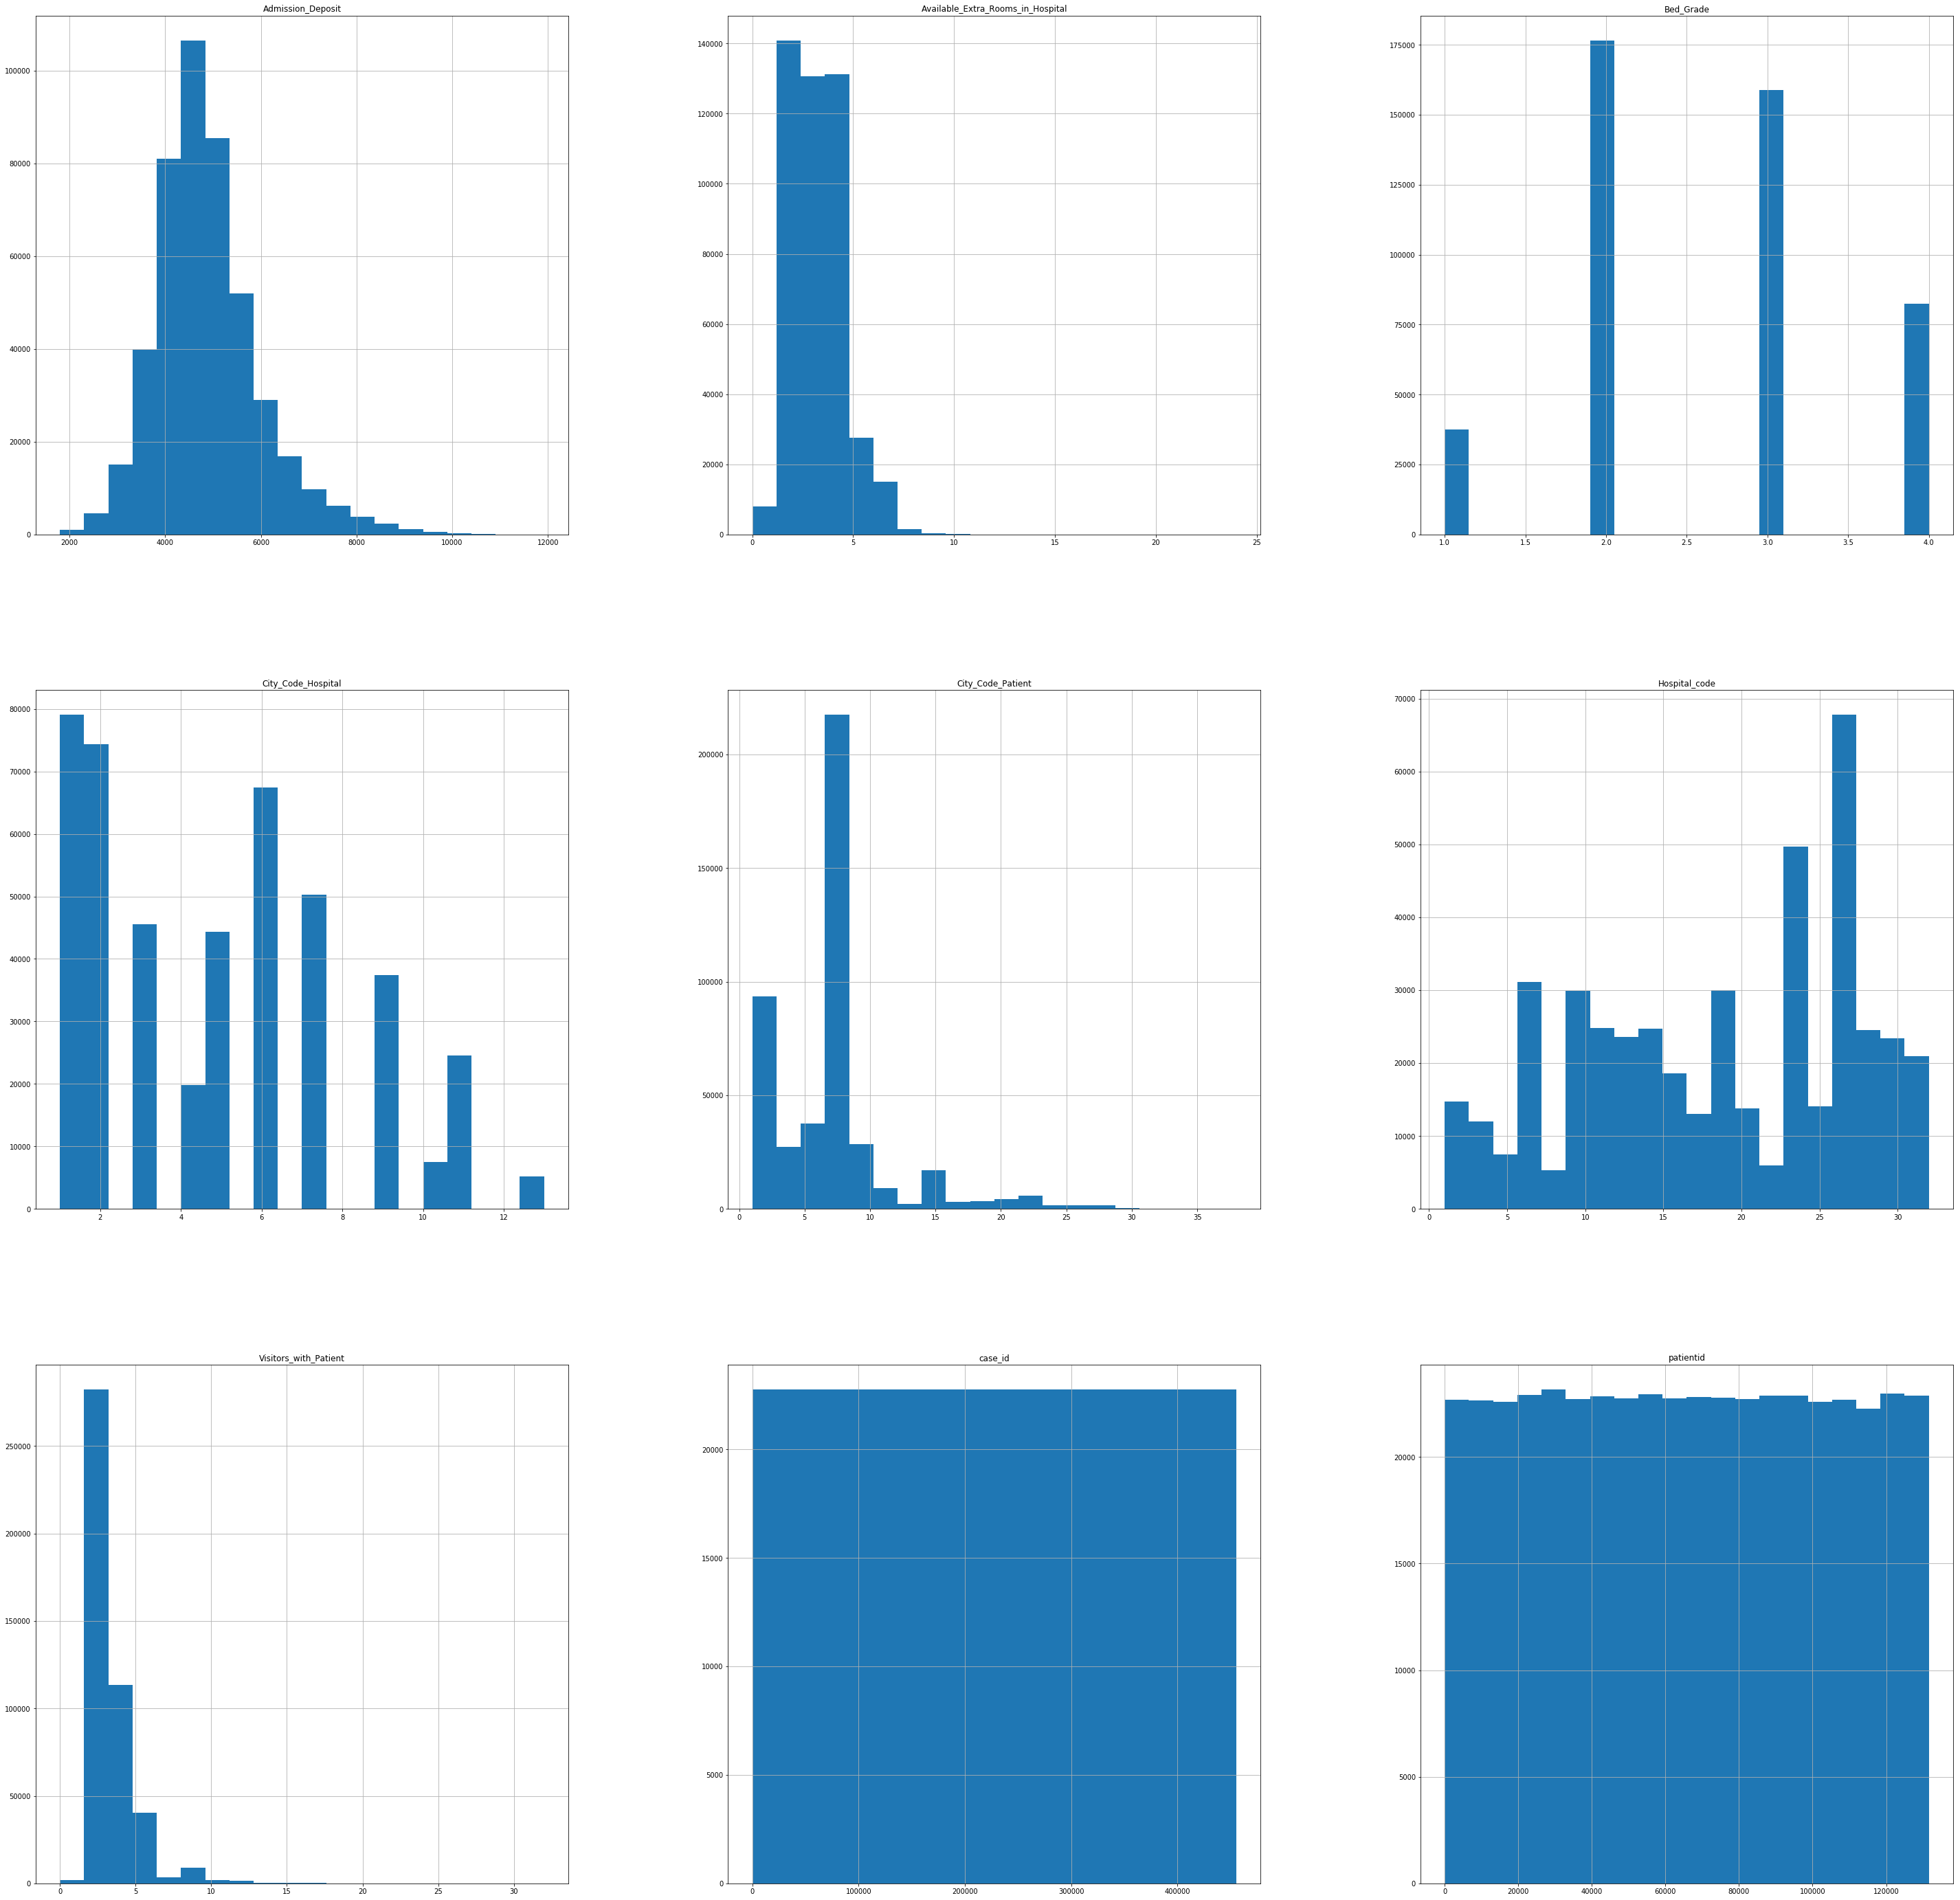

In [15]:
fig_dims = (50, 50)
fig, ax = plt.subplots(figsize=fig_dims)

#sns.countplot(x="City_Code_Patient",ax=ax, data=data)
hist = data.hist(bins=20, ax=ax) 
plt.savefig("hist.png")
plt.show()
plt.close()

In [16]:
arr = data["case_id"].unique()   
# storing unique value in a variable 
unique_value = data["case_id"].nunique(dropna = True) 
print(len(arr), unique_value)

455495 455495


In [17]:
#data.info()
data.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available_Extra_Rooms_in_Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed_Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type_of_Admission                     object
Severity_of_Illness                   object
Visitors_with_Patient                  int64
Age                                   object
Admission_Deposit                    float64
dtype: object

In [18]:
#df.shape
print(data.isnull().sum())
#df.head()
#data.info()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available_Extra_Rooms_in_Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed_Grade                            0
patientid                            0
City_Code_Patient                    0
Type_of_Admission                    0
Severity_of_Illness                  0
Visitors_with_Patient                0
Age                                  0
Admission_Deposit                    0
dtype: int64


In [19]:
data = data.astype({"Admission_Deposit":'int', "City_Code_Patient":'int',"Bed_Grade":'int'})  
data.dtypes

case_id                               int64
Hospital_code                         int64
Hospital_type_code                   object
City_Code_Hospital                    int64
Hospital_region_code                 object
Available_Extra_Rooms_in_Hospital     int64
Department                           object
Ward_Type                            object
Ward_Facility_Code                   object
Bed_Grade                             int32
patientid                             int64
City_Code_Patient                     int32
Type_of_Admission                    object
Severity_of_Illness                  object
Visitors_with_Patient                 int64
Age                                  object
Admission_Deposit                     int32
dtype: object

In [20]:
#scaler = RobustScaler()
#scaler = RobustScaler()
scaler = MinMaxScaler()
data[["Available_Extra_Rooms_in_Hospital","City_Code_Patient","Visitors_with_Patient","Admission_Deposit"]] =scaler.fit_transform(data[["Available_Extra_Rooms_in_Hospital","City_Code_Patient","Visitors_with_Patient","Admission_Deposit"]])

c:\users\sheetal\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


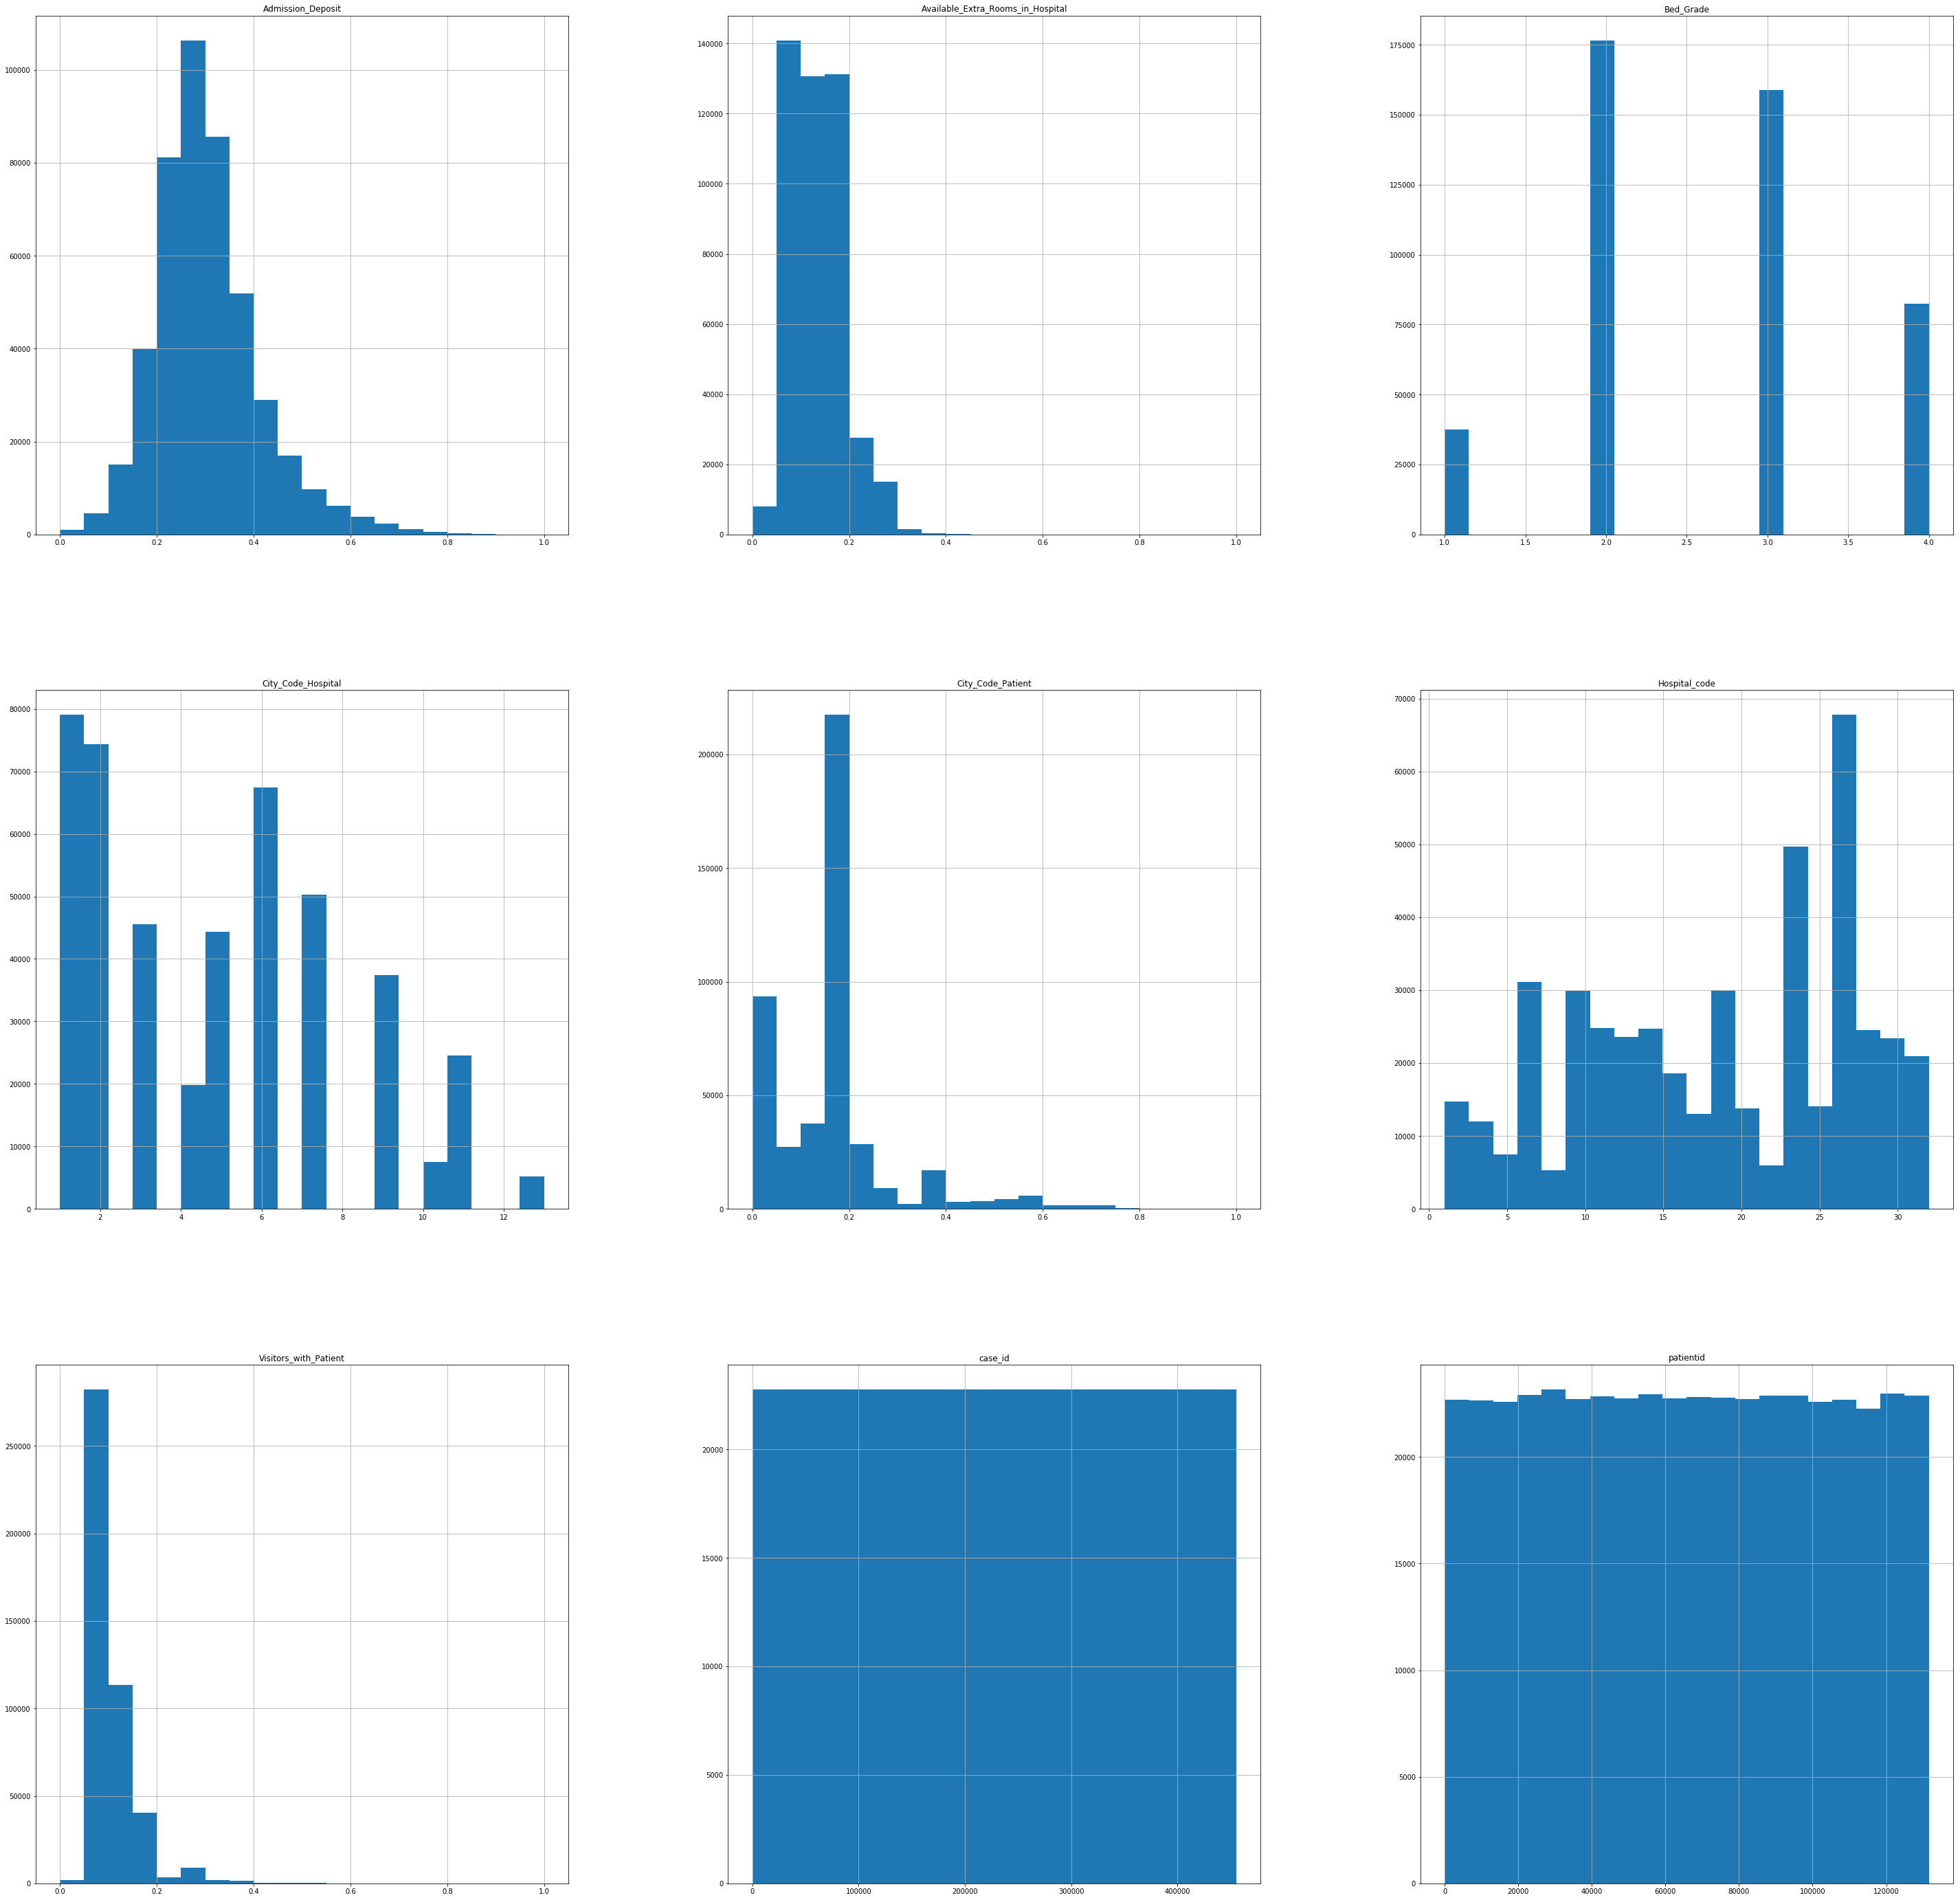

In [21]:
fig_dims = (50, 50)
fig, ax = plt.subplots(figsize=fig_dims)
hist = data.hist(bins=20, ax=ax) 
plt.savefig("hist_after_scale.png")
plt.show()
plt.close()

In [22]:
# Encode labels in column 'Department'.
cid = data['case_id'].unique()
cid.sort()
print(cid)
data['case_id']= label_encoder.fit_transform(data['case_id']) 
data['case_id'].unique()

[     1      2      3 ... 455493 455494 455495]


array([     0,      1,      2, ..., 455492, 455493, 455494], dtype=int64)

In [23]:
data['Department']= label_encoder.fit_transform(data['Department']) 
data['Department'].unique()

array([3, 1, 2, 0, 4], dtype=int64)

In [24]:
data['Ward_Type']= label_encoder.fit_transform(data['Ward_Type']) 
data['Ward_Type'].unique()

array([2, 3, 1, 0, 4, 5], dtype=int64)

In [25]:
data['Ward_Facility_Code']= label_encoder.fit_transform(data['Ward_Facility_Code']) 
data['Ward_Facility_Code'].unique()

array([5, 4, 3, 1, 0, 2], dtype=int64)

In [26]:
data['Type_of_Admission']= label_encoder.fit_transform(data['Type_of_Admission']) 
data['Type_of_Admission'].unique()

array([0, 1, 2], dtype=int64)

In [27]:
data['Severity_of_Illness']= label_encoder.fit_transform(data['Severity_of_Illness']) 
data['Severity_of_Illness'].unique()

array([0, 2, 1], dtype=int64)

In [28]:
data['Age']= label_encoder.fit_transform(data['Age']) 
data['Age'].unique()

array([5, 7, 3, 4, 8, 6, 2, 1, 0, 9], dtype=int64)

In [29]:
data['Hospital_type_code']= label_encoder.fit_transform(data['Hospital_type_code']) 
data['Hospital_type_code'].unique()

array([2, 4, 1, 0, 5, 3, 6], dtype=int64)

In [30]:
data['Hospital_region_code']= label_encoder.fit_transform(data['Hospital_region_code']) 
data['Hospital_region_code'].unique()

array([2, 0, 1], dtype=int64)

In [31]:
data['Bed_Grade']= label_encoder.fit_transform(data['Bed_Grade']) 
data['Bed_Grade'].unique()

array([1, 2, 3, 0], dtype=int64)

In [32]:
data['City_Code_Hospital']= label_encoder.fit_transform(data['City_Code_Hospital']) 
data['City_Code_Hospital'].unique()

array([ 2,  4,  0,  1,  5,  7,  8,  3,  9,  6, 10], dtype=int64)

In [33]:
print(data['Admission_Deposit'].unique())

[0.30741107 0.41047431 0.29100791 ... 0.01086957 0.67549407 0.70642292]


In [34]:
data['Hospital_code']= label_encoder.fit_transform(data['Hospital_code']) 
data['Hospital_code'].unique()

array([ 7,  1,  9, 25, 22, 31,  0, 21, 15,  8,  5, 28, 11,  2, 20, 27, 26,
       18,  4, 13, 12, 30, 23, 16, 24, 14, 10, 29, 17,  3,  6, 19],
      dtype=int64)

In [35]:
data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit
0,0,7,2,2,2,0.125000,3,2,5,1,31397,0.162162,0,0,0.0625,5,0.307411
1,1,1,2,4,2,0.083333,3,3,5,1,31397,0.162162,1,0,0.0625,5,0.410474
2,2,9,4,0,0,0.083333,1,3,4,1,31397,0.162162,1,0,0.0625,5,0.291008
3,3,25,1,1,1,0.083333,3,2,3,1,31397,0.162162,1,0,0.0625,5,0.540711
4,4,25,1,1,1,0.083333,3,3,3,1,31397,0.162162,1,0,0.0625,5,0.371344


In [36]:
data.describe()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit
count,455495.00000,455495.000000,455495.000000,455495.000000,455495.000000,455495.000000,455495.000000,455495.000000,455495.000000,455495.000000,455495.000000,455495.000000,455495.000000,455495.000000,455495.000000,455495.000000,455495.000000
mean,227747.00000,17.326335,1.256501,3.592349,0.778461,0.133173,1.944024,1.888087,3.286956,1.628215,65786.793563,0.169203,0.782867,1.374033,0.102632,4.126757,0.304094
std,131490.22477,8.634036,1.532773,2.806344,0.753238,0.048625,0.561536,0.804688,1.689726,0.871929,37968.830850,0.127695,0.689184,0.768535,0.055251,1.889698,0.107212
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,113873.50000,10.000000,0.000000,1.000000,0.000000,0.083333,2.000000,1.000000,2.000000,1.000000,32874.000000,0.081081,0.000000,1.000000,0.062500,3.000000,0.235573
50%,227747.00000,18.000000,1.000000,4.000000,1.000000,0.125000,2.000000,2.000000,4.000000,2.000000,65735.000000,0.189189,1.000000,2.000000,0.093750,4.000000,0.290316
75%,341620.50000,25.000000,2.000000,6.000000,1.000000,0.166667,2.000000,2.000000,5.000000,2.000000,98576.500000,0.189189,1.000000,2.000000,0.125000,5.000000,0.356225
max,455494.00000,31.000000,6.000000,10.000000,2.000000,1.000000,4.000000,5.000000,5.000000,3.000000,131624.000000,1.000000,2.000000,2.000000,1.000000,9.000000,1.000000


In [37]:
data.shape

(455495, 17)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455495 entries, 0 to 137056
Data columns (total 17 columns):
case_id                              455495 non-null int64
Hospital_code                        455495 non-null int64
Hospital_type_code                   455495 non-null int32
City_Code_Hospital                   455495 non-null int64
Hospital_region_code                 455495 non-null int32
Available_Extra_Rooms_in_Hospital    455495 non-null float64
Department                           455495 non-null int32
Ward_Type                            455495 non-null int32
Ward_Facility_Code                   455495 non-null int32
Bed_Grade                            455495 non-null int64
patientid                            455495 non-null int64
City_Code_Patient                    455495 non-null float64
Type_of_Admission                    455495 non-null int32
Severity_of_Illness                  455495 non-null int32
Visitors_with_Patient                455495 non-null float6

### preprocessing of df (train_data) ends here

In [39]:
data_train = data.iloc[:318438]
data_test = data.iloc[318438:]

In [40]:
X = data_train.values
test = data_test.values
y = stay_train.values

noww y_test is ready

In [ ]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X, y)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X, y)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X, y)))

# # Make predictions and store in 'Survived' column of df_test

Learning rate:  0.05
Accuracy score (training): 0.300
Accuracy score (validation): 0.300


In [ ]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X, y)
Y_pred = gb_clf2.predict(test)

#Y_pred = svclassifier.predict(test)
df_test['Stay'] = Y_pred

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [ ]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

In [ ]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
y_pred = gb_clf2.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("\n\nConfusion Matrix: \n\n", confusion_matrix(y_test, y_pred))
print ("\n\nAccuracy : \n\n", accuracy_score(y_test,y_pred)*100)
print("\n\nReport : \n\n", classification_report(y_test, y_pred))